Name: Yuta Hirahata

Student ID: 2600220326-9

# Data Organization

In [165]:
import random
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [166]:
df = pd.read_csv('SocialMedia_EmotionalState.csv')

In [167]:
df

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,998.0,35.0,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,999.0,28.0,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df.shape

(2000, 10)

In [169]:
df = df.dropna()

In [170]:
df = df.drop(columns=['User_ID'])

In [171]:
df.describe()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.510000,95.950000,3.321000,39.898000,15.611000,22.560000
std,3.930057,38.850442,1.914582,26.393867,8.819493,8.516274
min,21.000000,40.000000,1.000000,5.000000,2.000000,8.000000
25%,24.000000,65.000000,2.000000,20.000000,8.000000,17.750000
50%,27.500000,85.000000,3.000000,33.000000,14.000000,22.000000
75%,30.250000,120.000000,4.000000,55.000000,22.000000,28.000000
max,35.000000,200.000000,8.000000,110.000000,40.000000,50.000000


In [172]:
df.head()

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
1,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
3,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
5,22.0,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
7,28.0,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
9,33.0,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [173]:
# convert the gender, platform, and dominant emotion values to float
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Non-binary': 2}) #Male=0, Female=1, Non-binary=2
df['Platform'] = df['Platform'].map({'Instagram': 0, 'Twitter': 1, 'Facebook': 2, 'LinkedIn': 3, 'Snapchat': 4, 'Whatsapp': 5, 'Telegram': 6}) #Instagram=0, Twitter=1, Facebook=2, LinkedIn=3, Snapchat=4, Whatsapp=5, Telegram=6
df['Dominant_Emotion'] = df['Dominant_Emotion'].map({'Happiness': 0, 'Neutral': 1, 'Boredom': 2, 'Anxiety': 3, 'Anger': 4, 'Sadness': 5}) #Happiness=0, Neutral=1, Boredom=2, Anxiety=3, Anger=4, Sadness=5
df.head()

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
1,25.0,1,0,120.0,3.0,45.0,10.0,12.0,0
3,30.0,0,1,90.0,5.0,20.0,25.0,30.0,4
5,22.0,2,2,60.0,2.0,15.0,5.0,20.0,1
7,28.0,1,0,200.0,8.0,100.0,30.0,50.0,3
9,33.0,0,3,45.0,1.0,5.0,2.0,10.0,2


In [174]:
corr = df[['Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Dominant_Emotion']].corr(method='pearson')

# Display correlation table
display(corr)

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
Age,1.000000,-0.204699,0.037275,0.087297,0.028109,0.058818,0.098809,0.107531,-0.004107
Gender,-0.204699,1.000000,0.068377,-0.157222,-0.190253,-0.214439,-0.246418,-0.218782,-0.037929
Platform,0.037275,0.068377,1.000000,-0.538444,-0.515210,-0.549088,-0.499473,-0.421669,0.210186
Daily_Usage_Time (minutes),0.087297,-0.157222,-0.538444,1.000000,0.889205,0.941340,0.896920,0.916234,-0.379153
Posts_Per_Day,0.028109,-0.190253,-0.515210,0.889205,1.000000,0.917814,0.917309,0.875708,-0.255166
Likes_Received_Per_Day,0.058818,-0.214439,-0.549088,0.941340,0.917814,1.000000,0.931057,0.910046,-0.338593
Comments_Received_Per_Day,0.098809,-0.246418,-0.499473,0.896920,0.917309,0.931057,1.000000,0.882783,-0.276238
Messages_Sent_Per_Day,0.107531,-0.218782,-0.421669,0.916234,0.875708,0.910046,0.882783,1.000000,-0.255262
Dominant_Emotion,-0.004107,-0.037929,0.210186,-0.379153,-0.255166,-0.338593,-0.276238,-0.255262,1.000000


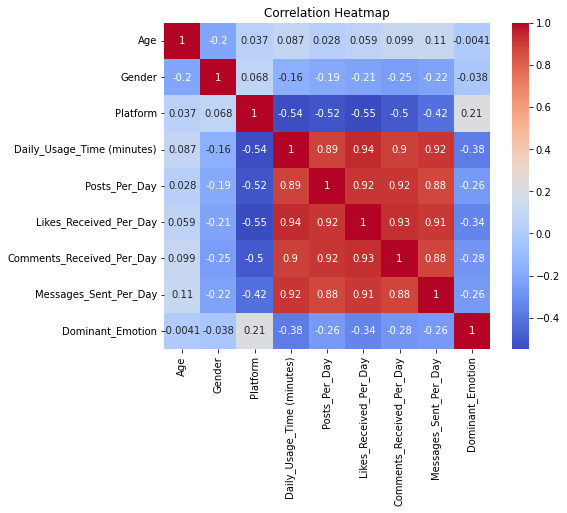

In [175]:
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

# Data Classification

In [176]:
X = df.drop('Dominant_Emotion', axis=1) # features
y = df['Dominant_Emotion'] # target

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=269) # the last 3 digits of my student ID just in case

## Gaussian NB

In [178]:
model_Gaussian = GaussianNB() 
model_Gaussian.fit(X_train, y_train) # train the model

GaussianNB()

In [179]:
y_pred_gaussian = model_Gaussian.predict(X_test) # make predictions

print(classification_report(y_test, y_pred_gaussian))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69        40
           1       0.37      0.39      0.38        41
           2       0.59      0.86      0.70        35
           3       0.25      0.03      0.06        29
           4       0.33      0.70      0.45        27
           5       0.00      0.00      0.00        28

    accuracy                           0.47       200
   macro avg       0.37      0.45      0.38       200
weighted avg       0.39      0.47      0.41       200



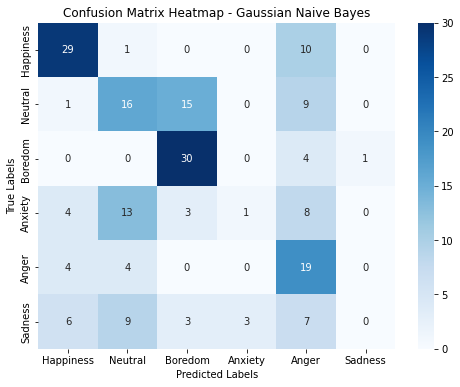

In [180]:
# Generate the confusion matrix
conf_matrix_gaussian = confusion_matrix(y_test, y_pred_gaussian)

# Define the labels for the indices
labels = ['Happiness', 'Neutral', 'Boredom', 'Anxiety', 'Anger', 'Sadness']

# Create the heatmap with the correct labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gaussian, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Gaussian Naive Bayes')
plt.show()

## MultinomialNB

In [181]:
model_Multinomial = MultinomialNB()
model_Multinomial.fit(X_train, y_train) # train the model

MultinomialNB()

In [182]:
y_pred_multinomial = model_Multinomial.predict(X_test) # make predictions

print(classification_report(y_test, y_pred_multinomial))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        40
           1       0.51      0.51      0.51        41
           2       0.62      0.86      0.72        35
           3       0.11      0.07      0.08        29
           4       0.59      0.70      0.64        27
           5       0.08      0.04      0.05        28

    accuracy                           0.54       200
   macro avg       0.44      0.51      0.47       200
weighted avg       0.47      0.54      0.50       200



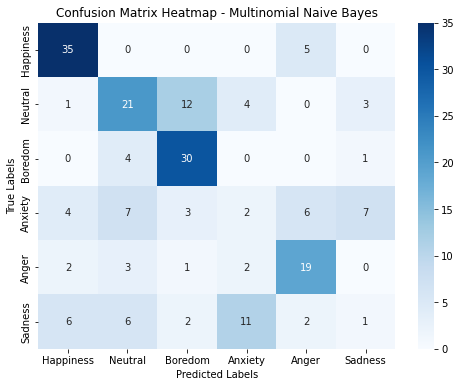

In [183]:
# Generate the confusion matrix
conf_matrix_multinomial = confusion_matrix(y_test, y_pred_multinomial)

# Define the labels for the indices
labels = ['Happiness', 'Neutral', 'Boredom', 'Anxiety', 'Anger', 'Sadness']

# Create the heatmap with the correct labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_multinomial, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Multinomial Naive Bayes')
plt.show()

## BernoulliNB

In [184]:
model_Bernoulli = BernoulliNB()
model_Bernoulli.fit(X_train, y_train) # train the model

BernoulliNB()

In [185]:
y_pred_bernoulli = model_Bernoulli.predict(X_test) # make predictions

print(classification_report(y_test, y_pred_bernoulli))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        40
           1       0.35      0.85      0.50        41
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        27
           5       0.17      0.32      0.22        28

    accuracy                           0.40       200
   macro avg       0.21      0.34      0.25       200
weighted avg       0.24      0.40      0.29       200



/Users/yutahirahata/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yutahirahata/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yutahirahata/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

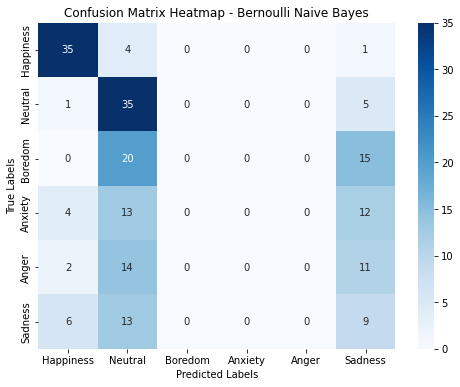

In [186]:
# Generate the confusion matrix
conf_matrix_bernoulli = confusion_matrix(y_test, y_pred_bernoulli)

# Define the labels for the indices
labels = ['Happiness', 'Neutral', 'Boredom', 'Anxiety', 'Anger', 'Sadness']

# Create the heatmap with the correct labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bernoulli, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Bernoulli Naive Bayes')
plt.show()

## CategoricalNB

In [187]:
model_Categorical = CategoricalNB()
model_Categorical.fit(X_train, y_train) # train the model

CategoricalNB()

In [188]:
y_pred_categorical = model_Categorical.predict(X_test) # make predictions

print(classification_report(y_test, y_pred_categorical))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.70      0.76      0.73        41
           2       0.84      0.77      0.81        35
           3       0.95      0.62      0.75        29
           4       0.59      0.89      0.71        27
           5       0.96      0.79      0.86        28

    accuracy                           0.79       200
   macro avg       0.82      0.79      0.79       200
weighted avg       0.82      0.79      0.79       200



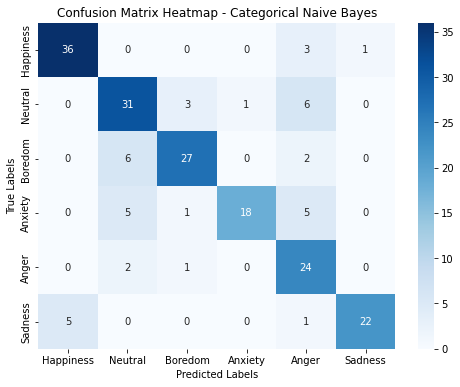

In [189]:
# Generate the confusion matrix
conf_matrix_categorical = confusion_matrix(y_test, y_pred_categorical)

# Define the labels for the indices
labels = ['Happiness', 'Neutral', 'Boredom', 'Anxiety', 'Anger', 'Sadness']

# Create the heatmap with the correct labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_categorical, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Categorical Naive Bayes')
plt.show()

## Random Forest

In [190]:
# Define the number of trees
n_trees = [5, 25, 50, 100, 200]

# Dictionary to store the models
rf_models = {}

# Train Random Forest models with different numbers of trees
for n in n_trees:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=269)
    rf_model.fit(X_train, y_train)
    rf_models[n] = rf_model

# Print the models to verify
for n, model in rf_models.items():
    print(f"Random Forest with {n} trees: {model}")

Random Forest with 5 trees: RandomForestClassifier(n_estimators=5, random_state=269)
Random Forest with 25 trees: RandomForestClassifier(n_estimators=25, random_state=269)
Random Forest with 50 trees: RandomForestClassifier(n_estimators=50, random_state=269)
Random Forest with 100 trees: RandomForestClassifier(random_state=269)
Random Forest with 200 trees: RandomForestClassifier(n_estimators=200, random_state=269)


In [191]:
# performance of Random Forest
for n, model in rf_models.items():
    predicted = model.predict(X_test)
    print(f"Random Forest with {n} trees:")
    print(classification_report(y_test, predicted))

Random Forest with 5 trees:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      1.00      1.00        41
           2       1.00      0.97      0.99        35
           3       1.00      1.00      1.00        29
           4       1.00      0.93      0.96        27
           5       0.90      0.96      0.93        28

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Random Forest with 25 trees:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      0.97      0.99        35
           3       1.00      1.00      1.00        29
           4       1.00      0.93      0.96        27
           5       0.90      1.00      0.95        28

    accuracy        

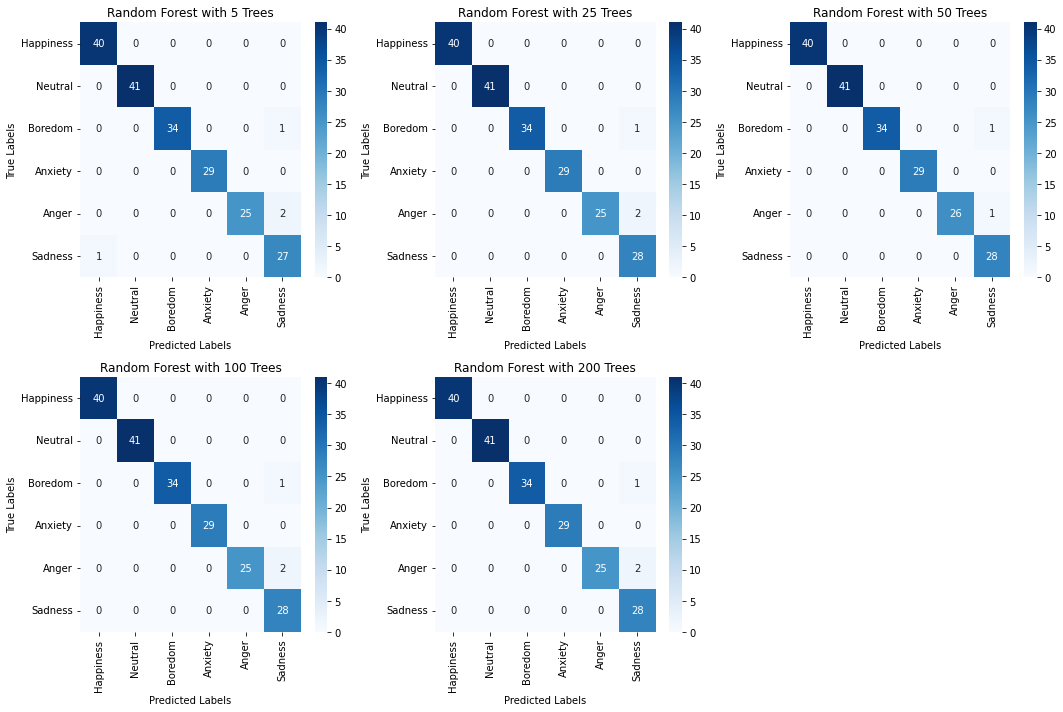

In [192]:
# Define the labels for the indices
labels = ['Happiness', 'Neutral', 'Boredom', 'Anxiety', 'Anger', 'Sadness']

# Define the number of rows and columns for the grid
n_models = len(rf_models)
n_rows = 2
n_cols = (n_models + 1) // n_rows  

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  
axes = axes.flatten()  # Flatten to easily iterate over axes

# Plot each confusion matrix in a subplot
for i, (n, model) in enumerate(rf_models.items()):
    predicted = model.predict(X_test)
    conf_matrix_rf = confusion_matrix(y_test, predicted)

    sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels, ax=axes[i])
    axes[i].set_title(f'Random Forest with {n} Trees')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


## Neural Network Model

In [80]:
import tensorflow as tf

# Build a simple feed-forward neural network
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(6, activation='softmax')  # Output layer 
])

# Compile the model
model_tf.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


C:\Users\yuta\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
model_tf.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.2749 - loss: 4.3508 
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.3983 - loss: 1.7899
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.3809 - loss: 1.5204
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.4887 - loss: 1.4210
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.5348 - loss: 1.3080
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.4670 - loss: 1.3595
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.4707 - loss: 1.3269
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5539 - loss: 1.2538
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5550 - loss: 1.2761
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.5760 - loss: 1.1796
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.5181 - loss: 1.3222
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 

In [82]:
# Predict and evaluate
predictions = model_tf.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [83]:
# Print the classification report
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.51      0.85      0.64        41
           2       0.89      0.71      0.79        35
           3       0.55      0.21      0.30        29
           4       0.79      0.41      0.54        27
           5       0.49      0.71      0.58        28

    accuracy                           0.66       200
   macro avg       0.69      0.63      0.62       200
weighted avg       0.70      0.66      0.65       200

